## Importing Libraries

In [ ]:
import pandas as pd
from scipy.io import arff

import seaborn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

#  1. Vertebral Column Data Set

### (a) Download the Vertebral Column Data Set from:
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column


In [ ]:
arff_data = arff.loadarff(open('../data/vertebral_column_data/column_2C_weka.arff'))

df = pd.DataFrame(arff_data[0])

features = df.drop(columns=['class'])
df.head(-1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,b'Normal'
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'


### (b) Pre-Processing and Exploratory data analysis:


#### i) Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.


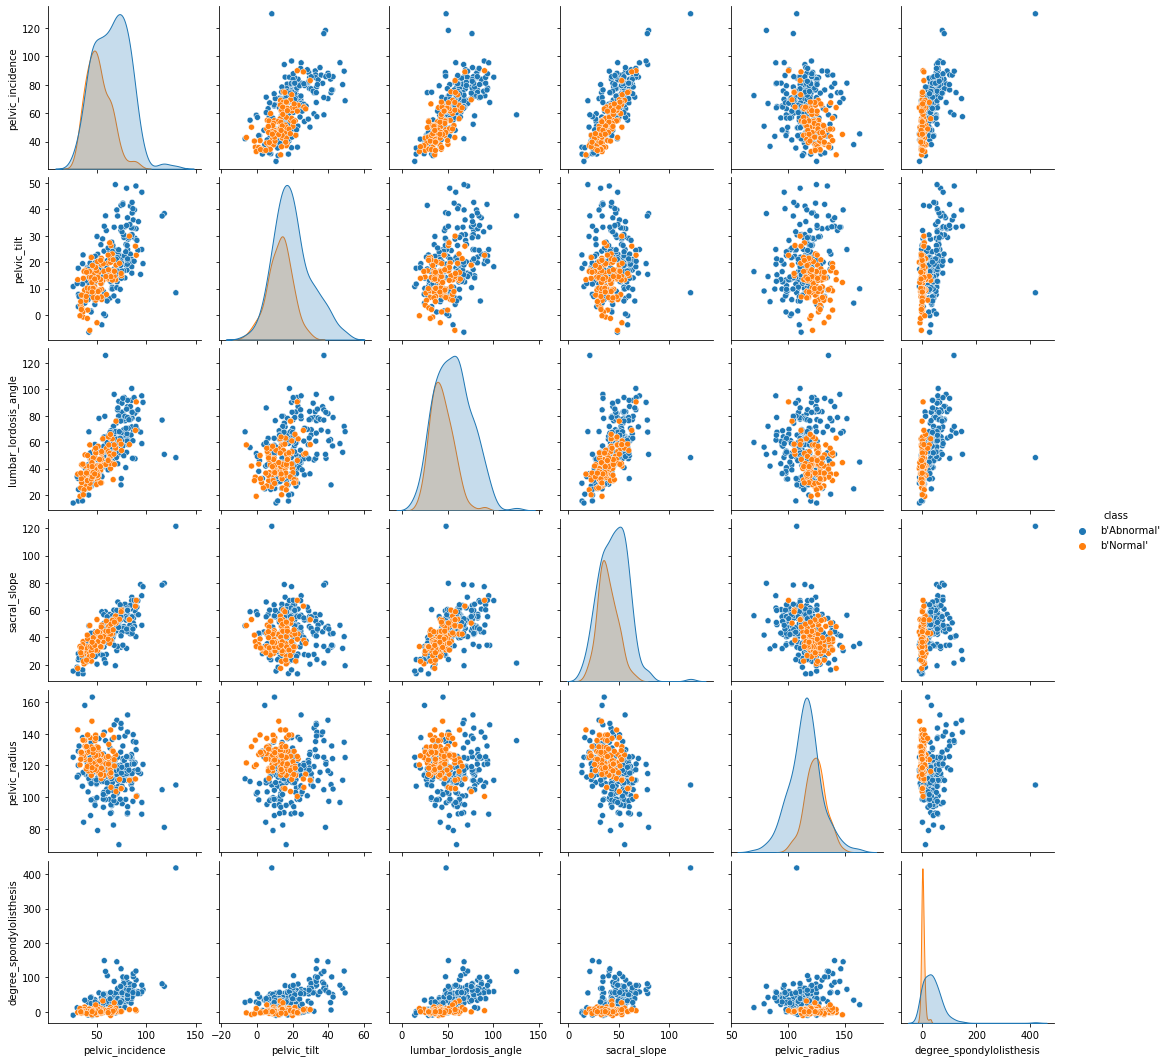

In [ ]:

seaborn.pairplot(data = df, hue = 'class')

#graph = seaborn.FacetGrid(df, col = 'class', hue = 'class')
#graph.map(seaborn.scatterplot, 'pelvic_incidence', 'class')

#graph = seaborn.PairGrid(df, hue = 'class')
#graph.map(seaborn.scatterplot)

#seaborn.scatterplot(data=df, x='pelvic_incidence', y='class', hue ='class')


#### ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1


<AxesSubplot:xlabel='pelvic_incidence', ylabel='class'>

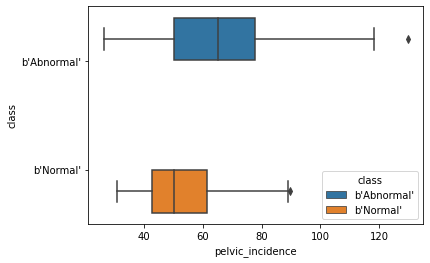

In [ ]:
seaborn.boxplot(data = df, x = 'pelvic_incidence', y = 'class', hue = 'class')

<AxesSubplot:xlabel='pelvic_tilt', ylabel='class'>

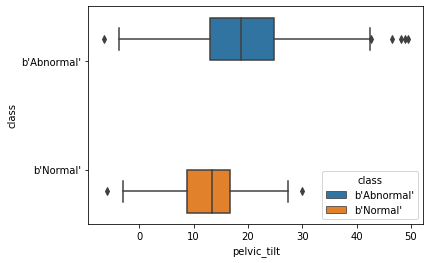

In [ ]:
seaborn.boxplot(data = df, x = 'pelvic_tilt', y = 'class', hue = 'class')


<AxesSubplot:xlabel='lumbar_lordosis_angle', ylabel='class'>

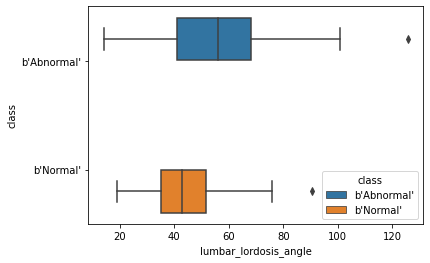

In [ ]:
seaborn.boxplot(data = df, x = 'lumbar_lordosis_angle', y = 'class', hue = 'class')

<AxesSubplot:xlabel='sacral_slope', ylabel='class'>

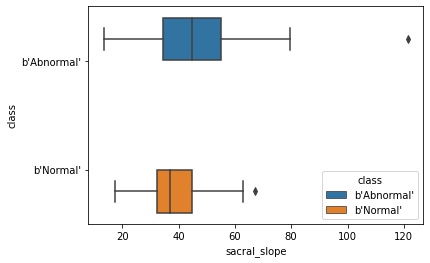

In [ ]:
seaborn.boxplot(data = df, x = 'sacral_slope', y = 'class', hue = 'class')

<AxesSubplot:xlabel='pelvic_radius', ylabel='class'>

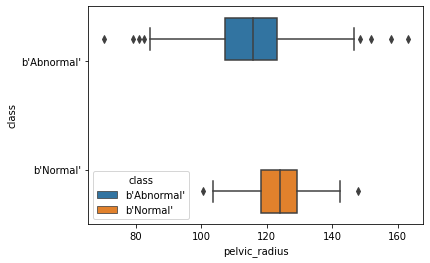

In [ ]:
seaborn.boxplot(data = df, x = 'pelvic_radius', y = 'class', hue = 'class')

<AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='class'>

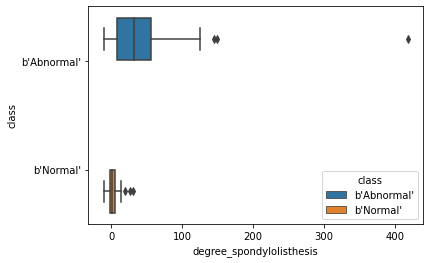

In [ ]:
seaborn.boxplot(data = df, x = 'degree_spondylolisthesis', y = 'class', hue = 'class')

#### Converting labels to 0 and 1

In [ ]:
df['class'] = np.where(df['class'] == df['class'][1], 1, 0)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


#### iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


In [ ]:

X_train = pd.concat([pd.DataFrame(df.loc[df['class'] == 0]).iloc[0:70],pd.DataFrame(df.loc[df['class'] == 1]).iloc[0:140]], ignore_index = True)
Xtr = X_train
X_train = X_train.drop(columns = ['class'])

X_test = pd.concat([pd.DataFrame(df.loc[df['class'] == 0]).iloc[70:],pd.DataFrame(df.loc[df['class'] == 1]).iloc[140:]], ignore_index = True)
Xte = X_test
X_test = X_test.drop(columns = ['class'])

y_train = pd.concat([pd.DataFrame(df.loc[df['class'] ==0])['class'].iloc[0:70],pd.DataFrame(df.loc[df['class'] ==1])['class'].iloc[0:140]], ignore_index = True)
y_test = pd.concat([pd.DataFrame(df.loc[df['class'] ==0])['class'].iloc[70:],pd.DataFrame(df.loc[df['class'] ==1])['class'].iloc[140:]], ignore_index = True)

Xte.loc[Xtr['class'] ==0]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
1,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
2,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
3,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
4,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
65,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,1
66,67.027664,13.281502,66.150403,53.746162,100.715413,33.989136,1
67,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,1
68,80.654320,26.344379,60.898118,54.309940,120.103493,52.467552,1


### (c) Classification using KNN on Vertebral Column Data Set

### i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).


### ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205 , . . . , 7, 4, 1} (in reverse order)

Text(0, 0.5, 'Error Rate')

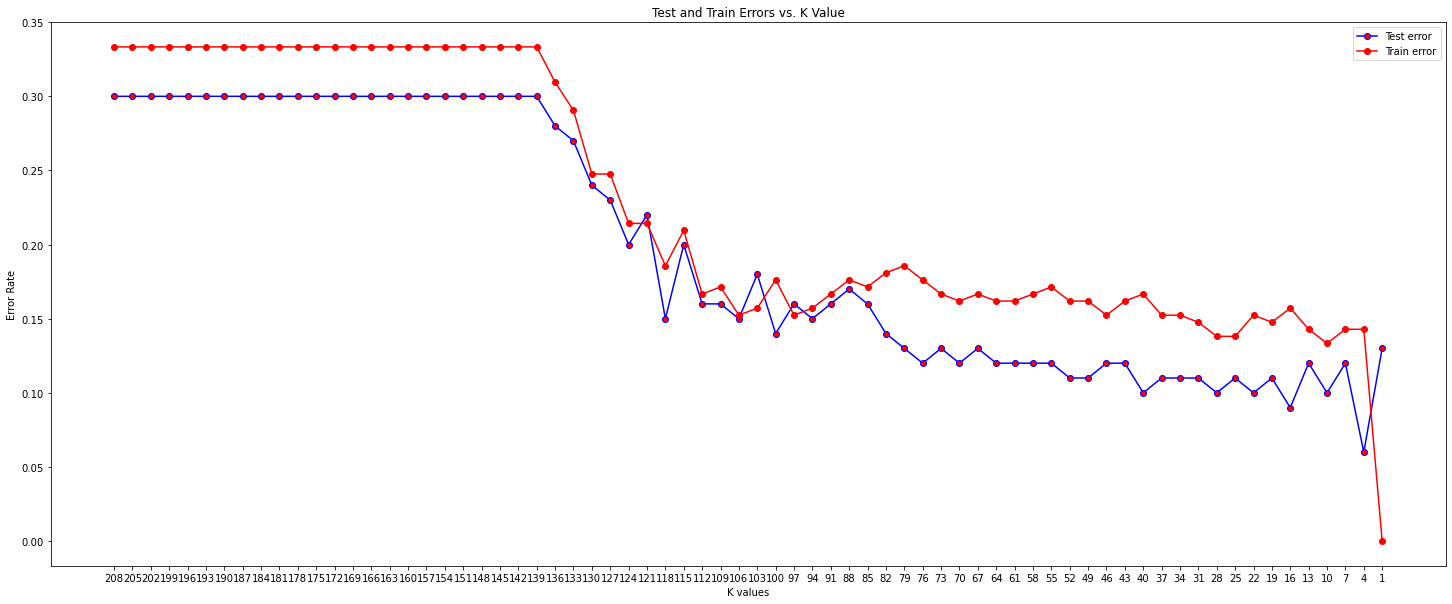

In [ ]:
neighbor = np.arange(208, 0, -3)

train_accuracy = np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

error = []
error_train = []

for i,k in enumerate(neighbor): #Default metric is Minkowski with p=2, giving Euclidean Metric
    model = KNeighborsClassifier(n_neighbors=k)  #Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    error_train.append(np.mean(y_predict_train != y_train))
    error.append(np.mean(y_predict != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracy[i] = model.score(X_train, y_train)
    test_accuracy[i] = model.score(X_test, y_test)
    

plt.figure(figsize =(25, 10))
plt.plot(error, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 6)

plt.plot(error_train, color ='red',
                linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6)

plt.legend(labels = ['Test error', 'Train error'])    

plt.xticks(range(len(neighbor)), neighbor)
plt.title('Test and Train Errors vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')

In [ ]:
print('k at', neighbor[error.index(min(error))], 'gives best value, with Min error of ', min(error)) #Best K is at 4 for Euclidean Metric

k at 4 gives best value, with Min error of  0.06


## Plotting Training and Testing Accuracy

    Train Accuracy  Test Accuracy  neighbor
0         0.666667           0.70       208
1         0.666667           0.70       205
2         0.666667           0.70       202
3         0.666667           0.70       199
4         0.666667           0.70       196
..             ...            ...       ...
65        0.857143           0.88        13
66        0.866667           0.90        10
67        0.857143           0.88         7
68        0.857143           0.94         4
69        1.000000           0.87         1

[70 rows x 3 columns]


Text(0, 0.5, 'Accuracy')

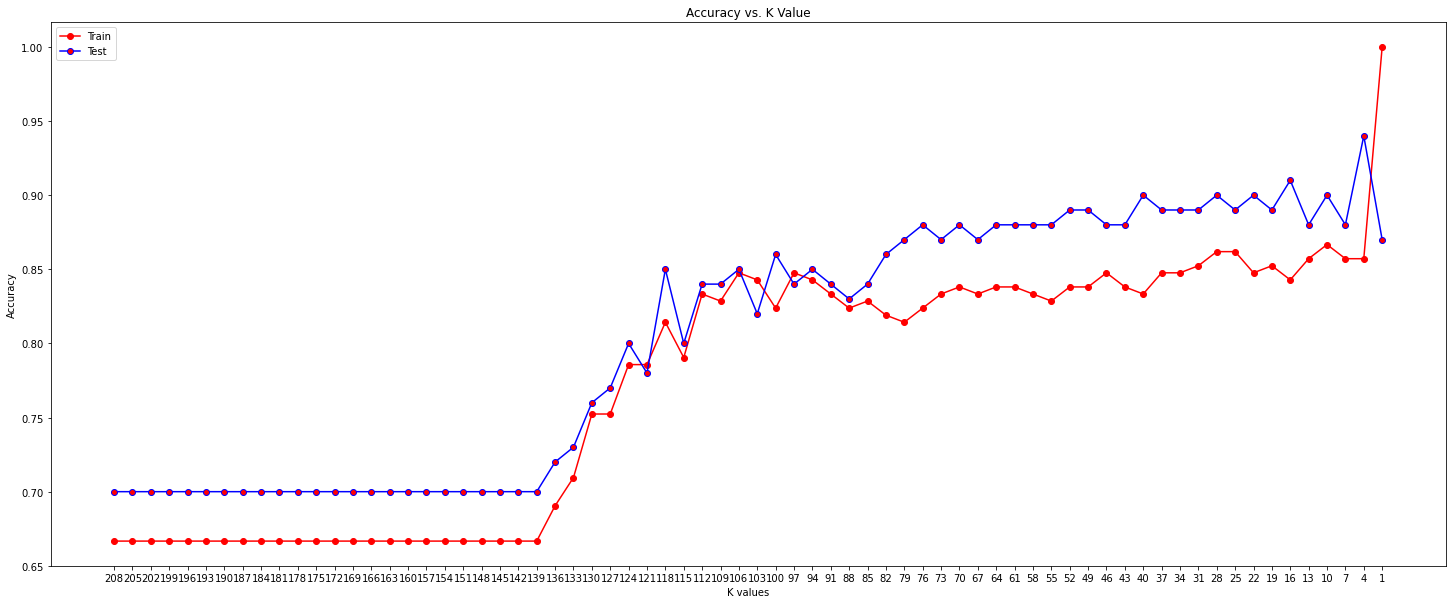

In [ ]:
#print(train_accuracy)

table_train = pd.DataFrame([train_accuracy]).T
table_train['Train Accuracy'] = table_train.iloc[:,0]
table_train = table_train.drop(columns = 0)

#print(test_accuracy)

table_test = pd.DataFrame([test_accuracy]).T
table_test['Test Accuracy'] = table_test.iloc[:,0]
table_test = table_test.drop(columns = 0)

table = pd.concat([table_train,table_test], axis = 1)

df9 = pd.DataFrame([neighbor]).T
df9['neighbor'] = df9.iloc[:,0]
df9 = df9.drop(columns = 0)

table = pd.concat([table, df9], axis = 1)
print(table.head(100))

plt.figure(figsize =(25, 10))
plt.plot(table['Train Accuracy'], color ='red',
                linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6)
               
plt.plot(table['Test Accuracy'], color ='blue',
                linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6)

plt.legend(labels = ['Train', 'Test'])               
plt.xticks(range(len(neighbor)), neighbor)
plt.title('Accuracy vs. K Value')
plt.xlabel('K values')
plt.ylabel('Accuracy')


### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗


In [ ]:
best_model = KNeighborsClassifier(n_neighbors=4)
best_model.fit(X_train, y_train)
y_predict_best = best_model.predict(X_test)

print('Confusion Matrix is: ')
print(confusion_matrix(y_test, y_predict_best))

TFPN_table = confusion_matrix(y_test, y_predict_best)

TP = TFPN_table[0][0]
FP = TFPN_table[0][1]
FN = TFPN_table[1][0]
TN = TFPN_table[1][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)

print('\nTrue Positive Rate:', TPR)
print('True Negative Rate:', TNR,'\n')

print(classification_report(y_test, y_predict_best))

Confusion Matrix is: 
[[25  5]
 [ 1 69]]

True Positive Rate: 0.9615384615384616
True Negative Rate: 0.9324324324324325 

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



## Finding Best K* for every size of training set, when the size of training set is N ∈ {10, 20, 30, ... 210}


In [ ]:
from sklearn.model_selection import train_test_split

N = np.arange(10,211,10)  # 306 because we lost some data during converting float to int, 75 for steps (expected 10)

count = 0
bestk =[]
for i,k in enumerate(N):  #k is number of samples, i is the index of each numpy N, (0,10), (1,85), ...
    X_trainchunks = pd.concat([pd.DataFrame(Xtr.loc[Xtr['class'] == 0]).iloc[0:int(0.3*k)],pd.DataFrame(Xtr.loc[Xtr['class'] == 1]).iloc[0:int(0.7*k)]], ignore_index = True)
    #print(X_trainchunks)
    X_trainchunks = X_trainchunks.drop(columns = ['class'])

    
    
    #X_testchunks = pd.concat([pd.DataFrame(Xte.loc[Xte['class'] == 0]).iloc[int(0.3*k):],pd.DataFrame(Xte.loc[Xte['class'] == 1]).iloc[int(0.7*k):]], ignore_index = True)
    #X_testchunks = X_testchunks.drop(columns = ['class'])

    y_trainchunks = pd.concat([pd.DataFrame(Xtr.loc[Xtr['class'] ==0])['class'].iloc[0:int(0.3*k)],pd.DataFrame(Xtr.loc[Xtr['class'] ==1])['class'].iloc[0:int(0.7*k)]], ignore_index = True)
    #y_testchunks = pd.concat([pd.DataFrame(df.loc[df['class'] ==0])['class'].iloc[int(0.3*k):],pd.DataFrame(df.loc[df['class'] ==1])['class'].iloc[int(0.7*k):]], ignore_index = True)

    #t_size = (0.3)*pd.DataFrame(X[0:k+1].loc(X[0:k+1]['class'] == 0)).shape[0] + (0.7)*pd.DataFrame(X[0:k+1].loc(X[0:k+1]['class'] == 1)).shape[0]
    #X_trainchunks, X_testchunks, y_trainchunks, y_testchunks = train_test_split(X, y, stratify=y, train_size=0.7)
    if(k<210):
        neighborchunks = np.arange(1, k+1, 5)
    else: neighborchunks = np.append(neighborchunks, 203)
    
    #print(neighborchunks)
    
    count+=1
    errorchunks = []
    #print(neighborchunks)
    #print('GRAPH OF ', len(neighborchunks), 'Samples running loop for ', count)
    train_accuracychunks = np.empty(len(neighborchunks))
    test_accuracychunks = np.empty(len(neighborchunks))
    
    
    
    for i,kc in enumerate(neighborchunks):
        modelchunks = KNeighborsClassifier(n_neighbors=kc)
        modelchunks.fit(X_trainchunks, y_trainchunks)
        y_predictchunks = modelchunks.predict(X_test)
        errorchunks.append(np.mean(y_predictchunks != y_test))  #?
        #train_accuracychunks[i] = modelchunks.score(X_trainchunks, y_trainchunks)
        test_accuracychunks[i] = modelchunks.score(X_test, y_test)
    

    #print('min of errorchunks is ',min(errorchunks), ' at index ', errorchunks.index(min(errorchunks)), 'of K equals to', neighborchunks[errorchunks.index(min(errorchunks))])
    bestk.append(neighborchunks[errorchunks.index(min(errorchunks))])
    #print((errorchunks))
    #print(errorchunks)    
    #print(train_accuracy)

    table_trainchunks = pd.DataFrame([train_accuracychunks]).T
    table_trainchunks['Train Accuracy'] = table_trainchunks.iloc[:,0]
    table_trainchunks = table_trainchunks.drop(columns = 0)

    #print(test_accuracy)

    #table_testchunks = pd.DataFrame([test_accuracychunks]).T
    #table_testchunks['Test Accuracy'] = table_testchunks.iloc[:,0]
    #table_testchunks = table_testchunks.drop(columns = 0)

    #tablechunks = pd.concat([table_trainchunks,table_testchunks], axis = 1)

    df9chunks = pd.DataFrame([neighborchunks]).T
    df9chunks['neighbor'] = df9chunks.iloc[:,0]
    df9chunks = df9chunks.drop(columns = 0)

    tablechunks = pd.concat([table_trainchunks, df9chunks], axis = 1)
    
    
#print(bestk)


In [ ]:
table_bestk = pd.DataFrame()
table_bestk['Sample Size'] = pd.DataFrame(N)
table_bestk['Best K Values'] = pd.DataFrame(bestk)
table_bestk.head(1000)

,Sample Size,Best K Values
0,10,1
1,20,6
2,30,1
3,40,1
4,50,16
5,60,21
6,70,26
7,80,26
8,90,31
9,100,6


### for each N, select your training set by choosing the first  N/3 rows of Class 0 and the first N - N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimalkis selected from {1, 6, 11, . . . , 196}

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 203]


Text(0, 0.5, 'Test Error Rate')

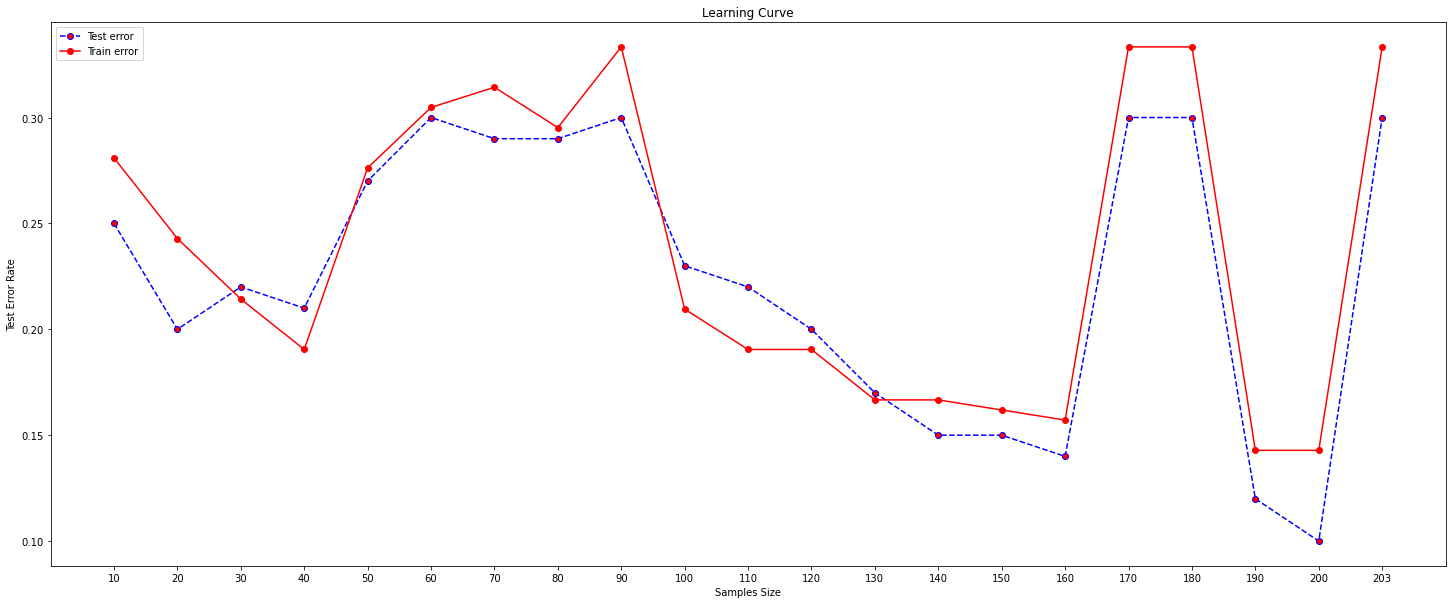

In [ ]:
klearn = np.array(bestk)
Nlearn = np.arange(10,201,10)
Nlearn = np.append(Nlearn, 203)
errorchunkslearn = []
print(Nlearn)

errorchunkslearn_train = []
for jl,samples in enumerate(Nlearn):
        
        X_trainchunkslearn = pd.concat([pd.DataFrame(Xtr.loc[Xtr['class'] == 0]).iloc[0:int(0.3*samples)],pd.DataFrame(Xtr.loc[Xtr['class'] == 1]).iloc[0:int(0.7*samples)]], ignore_index = True)
        X_trainchunkslearn = X_trainchunkslearn.drop(columns = ['class'])

        
        #X_testchunkslearn = pd.concat([pd.DataFrame(Xte.loc[Xte['class'] == 0]).iloc[int(0.3*samples):],pd.DataFrame(Xte.loc[Xte['class'] == 1]).iloc[int(0.7*samples):]], ignore_index = True)
        #X_testchunkslearn = X_testchunkslearn.drop(columns = ['class'])

        y_trainchunkslearn = pd.concat([pd.DataFrame(Xtr.loc[Xtr['class'] ==0])['class'].iloc[0:int(0.3*samples)],pd.DataFrame(Xtr.loc[Xtr['class'] ==1])['class'].iloc[0:int(0.7*samples)]], ignore_index = True)
        #y_testchunkslearn = pd.concat([pd.DataFrame(Xte.loc[Xte['class'] ==0])['class'].iloc[int(0.3*samples):],pd.DataFrame(Xte.loc[Xte['class'] ==1])['class'].iloc[int(0.7*samples):]], ignore_index = True)

        #print(X_testchunkslearn.head(1000))
        if(samples > X_trainchunkslearn.shape[0]):
            modelchunkslearn = KNeighborsClassifier(n_neighbors = X_trainchunkslearn.shape[0])
        else: modelchunkslearn = KNeighborsClassifier(n_neighbors = klearn[jl])  #since indices of klearn and Nlearn are corresponding
        modelchunkslearn.fit(X_trainchunkslearn, y_trainchunkslearn)
        y_predictchunkslearn_train = modelchunkslearn.predict(X_train)
        errorchunkslearn_train.append(np.mean(y_predictchunkslearn_train != y_train))
        y_predictchunkslearn = modelchunkslearn.predict(X_test)
        errorchunkslearn.append(np.mean(y_predictchunkslearn != y_test))  #?
        #train_accuracychunkslearn[i] = modelchunkslearn.score(X_trainchunkslearn, y_trainchunkslearn)
        #test_accuracychunkslearn[i] = modelchunkslearn.score(X_testchunkslearn, y_testchunkslearn)
        
    

    
plt.figure(figsize =(25, 10))
plt.plot(errorchunkslearn, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 6)

plt.plot(errorchunkslearn_train, color ='red',
                linestyle ='solid', marker = 'o',
         markerfacecolor ='red', markersize = 6)

plt.legend(labels = ['Test error', 'Train error'])    

plt.xticks(range(len(Nlearn)), Nlearn)
plt.title('Learning Curve')
plt.xlabel('Samples Size')
plt.ylabel('Test Error Rate')

## (d) Replace the Euclidean metric with the following metrics


### Minkowski Distance: 


#### A. which becomes Manhattan Distance with p = 1

[0.11, 0.11, 0.11, 0.12, 0.12, 0.11, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15, 0.15, 0.14, 0.14, 0.16, 0.15, 0.2, 0.2, 0.22, 0.21, 0.23, 0.21, 0.22, 0.24, 0.28, 0.28, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


Text(0, 0.5, 'Test Error Rate')

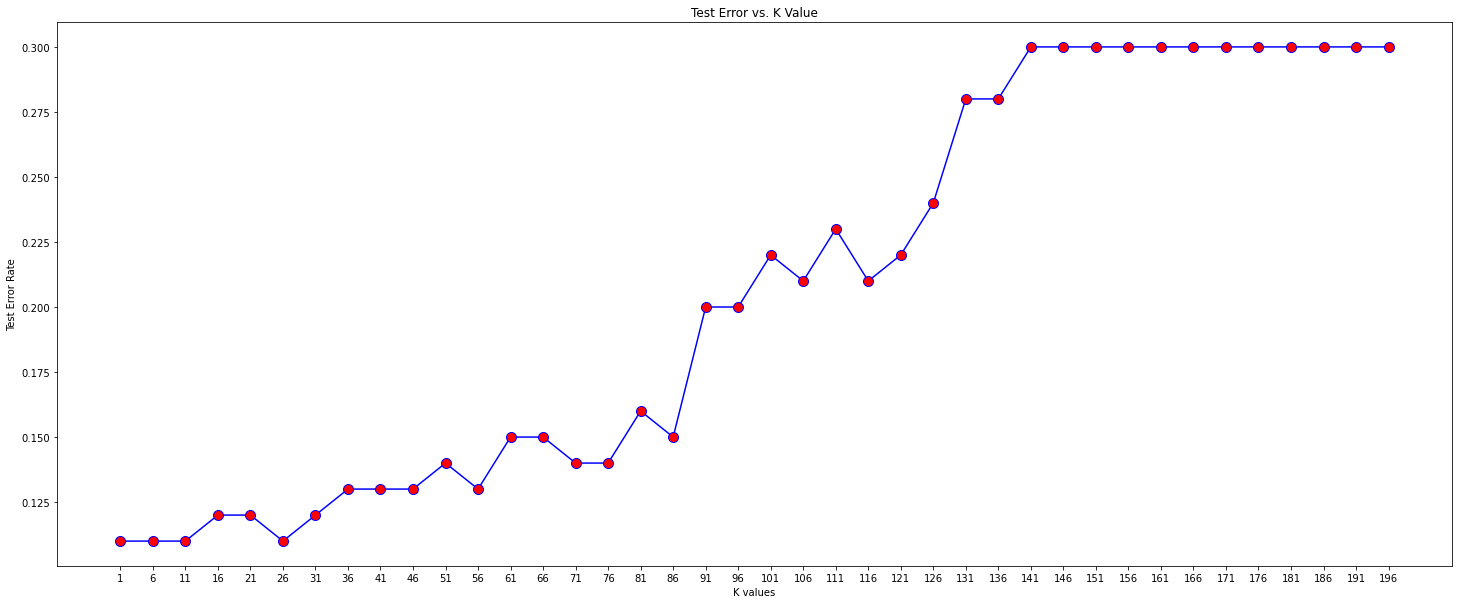

In [ ]:
neighborManh = np.arange(1, 197, 5)

train_accuracyManh = np.empty(len(neighborManh))
test_accuracyManh = np.empty(len(neighborManh))

errorManh = []
#errorManh_train = []

for i,k in enumerate(neighborManh):
    modelManh = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=1)
    modelManh.fit(X_train, y_train)
    #y_predictManh_train = modelManh.predict(X_train)
    #errorManh_train.append(np.mean(y_predictManh_train != y_train))
    y_predictManh = modelManh.predict(X_test)
    errorManh.append(np.mean(y_predictManh != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyManh[i] = modelManh.score(X_train, y_train)
    test_accuracyManh[i] = modelManh.score(X_test, y_test)
    
print(errorManh)
plt.figure(figsize =(25, 10))
plt.plot(errorManh, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 10)


plt.xticks(range(len(neighborManh)), neighborManh)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('Most suitable k* in Manhatten Distance is at k = ', 1, 'with an error of', min(errorManh))

Most suitable k* in Manhatten Distance is at k =  1 with an error of 0.11


#### B. with log10(p)∈ {0.1, 0.2, 0.3, ...1} . In this case, use the k∗ you found for the Manhattan distance


Text(0, 0.5, 'Test Error Rate')

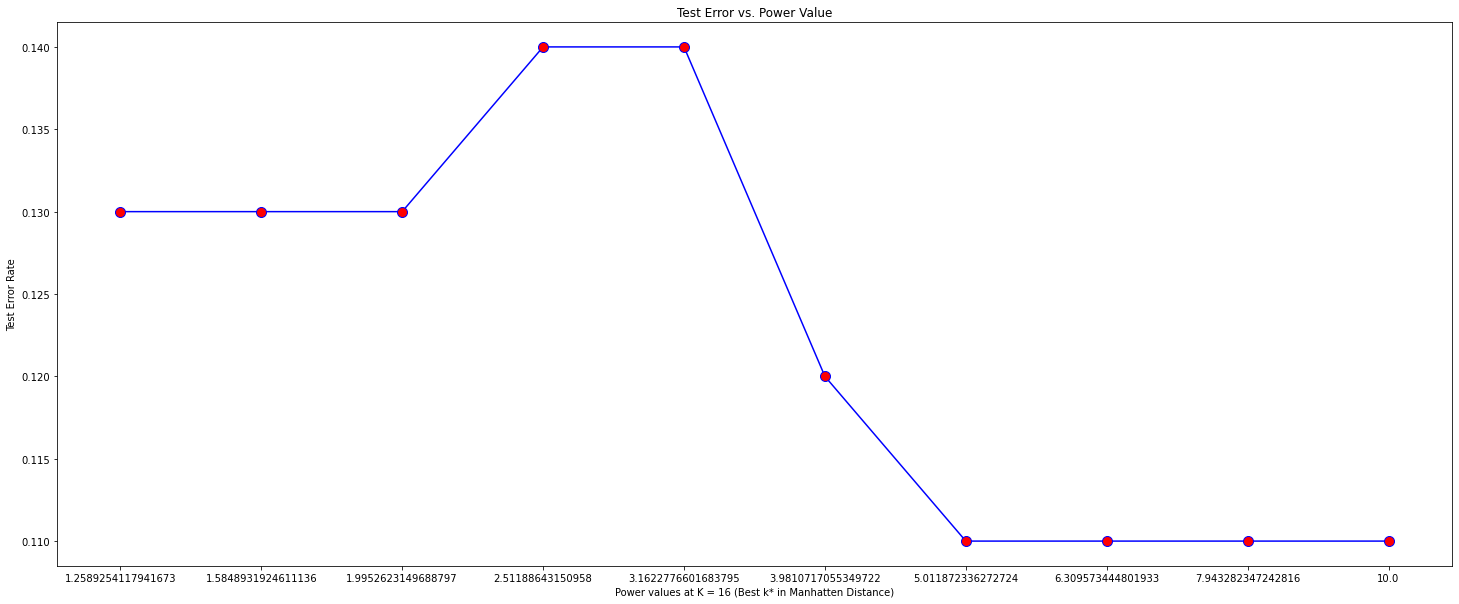

In [ ]:
neighborLog = np.arange(1, 197, 5)

train_accuracyLog = np.empty(len(neighborLog))
test_accuracyLog = np.empty(len(neighborLog))

errorLog = []
#errorLog_train = []
plogfeed = np.arange(0.1,1.1,0.1)
plog = np.power(10,plogfeed)


for il, numl in enumerate(plog):
        
        modelLog = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski', p = numl)
        modelLog.fit(X_train, y_train)
        #y_predictLog_train = modelLog.predict(X_train)
        #errorLog_train.append(np.mean(y_predictLog_train != y_train))
        y_predictLog = modelLog.predict(X_test)
        errorLog.append(np.mean(y_predictLog != y_test))  #?
        #error2.append(np.mean(y_predict))
        #train_accuracyLog[i] = modelLog.score(X_train, y_train)
        #test_accuracyLog[i] = modelLog.score(X_test, y_test)
    

    
plt.figure(figsize =(25, 10))
plt.plot(errorLog, color ='blue',
        linestyle ='solid', marker ='o',
 markerfacecolor ='red', markersize = 10)


plt.xticks(range(len(plog)), plog)
plt.title('Test Error vs. Power Value')
plt.xlabel('Power values at K = 16 (Best k* in Manhatten Distance)')
plt.ylabel('Test Error Rate')
    


In [ ]:
print('The best log(p) value is ', min(errorLog), 'at log(p) = {0.7, 0.8, 0.9, 1} at K = 1 (Best k* in Manhatten Distance)' )

The best log(p) value is  0.11 at log(p) = {0.7, 0.8, 0.9, 1} at K = 1 (Best k* in Manhatten Distance)


#### C. which becomes Chebyshev Distance with p → ∞

Text(0, 0.5, 'Test Error Rate')

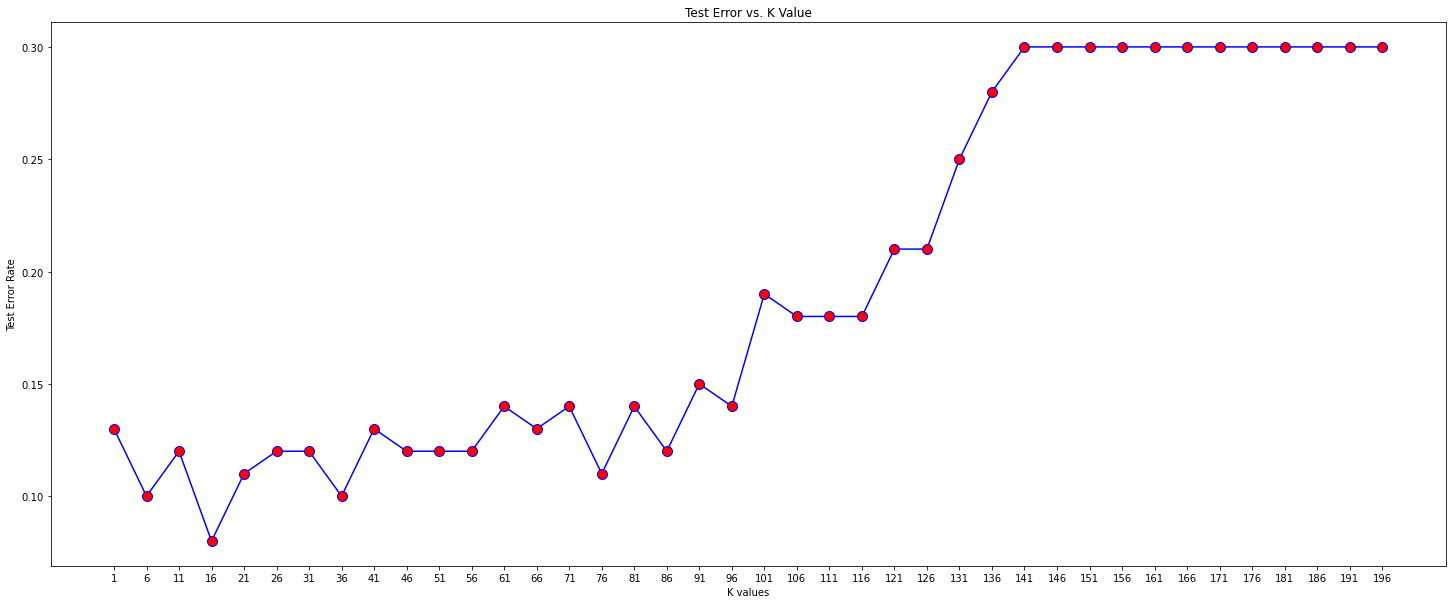

In [ ]:
neighborCheb = np.arange(1, 197, 5)

train_accuracyCheb = np.empty(len(neighborCheb))
test_accuracyCheb = np.empty(len(neighborCheb))

errorCheb = []
#errorCheb_train = []

for i,k in enumerate(neighborCheb):
    modelCheb = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    modelCheb.fit(X_train, y_train)
    #y_predictCheb_train = modelCheb.predict(X_train)
    #errorCheb_train.append(np.mean(y_predictCheb_train != y_train))
    y_predictCheb = modelCheb.predict(X_test)
    errorCheb.append(np.mean(y_predictCheb != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyCheb[i] = modelCheb.score(X_train, y_train)
    test_accuracyCheb[i] = modelCheb.score(X_test, y_test)
    
plt.figure(figsize =(25, 10))
plt.plot(errorCheb, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 10)


plt.xticks(range(len(neighborCheb)), neighborCheb)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('Most suitable k* in Chebyshev Distance is at k = ', neighborCheb[errorCheb.index(min(errorCheb))], 'with an error of', min(errorCheb))

Most suitable k* in Chebyshev Distance is at k =  16 with an error of 0.08


### ii. Mahalanobis Distance

[0.12, 0.08, 0.09, 0.08, 0.1, 0.09, 0.12, 0.1, 0.13, 0.11, 0.11, 0.09, 0.16, 0.12, 0.12, 0.09, 0.11, 0.1, 0.15, 0.09, 0.16, 0.15, 0.19, 0.08, 0.12, 0.1, 0.21, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


Text(0, 0.5, 'Test Error Rate')

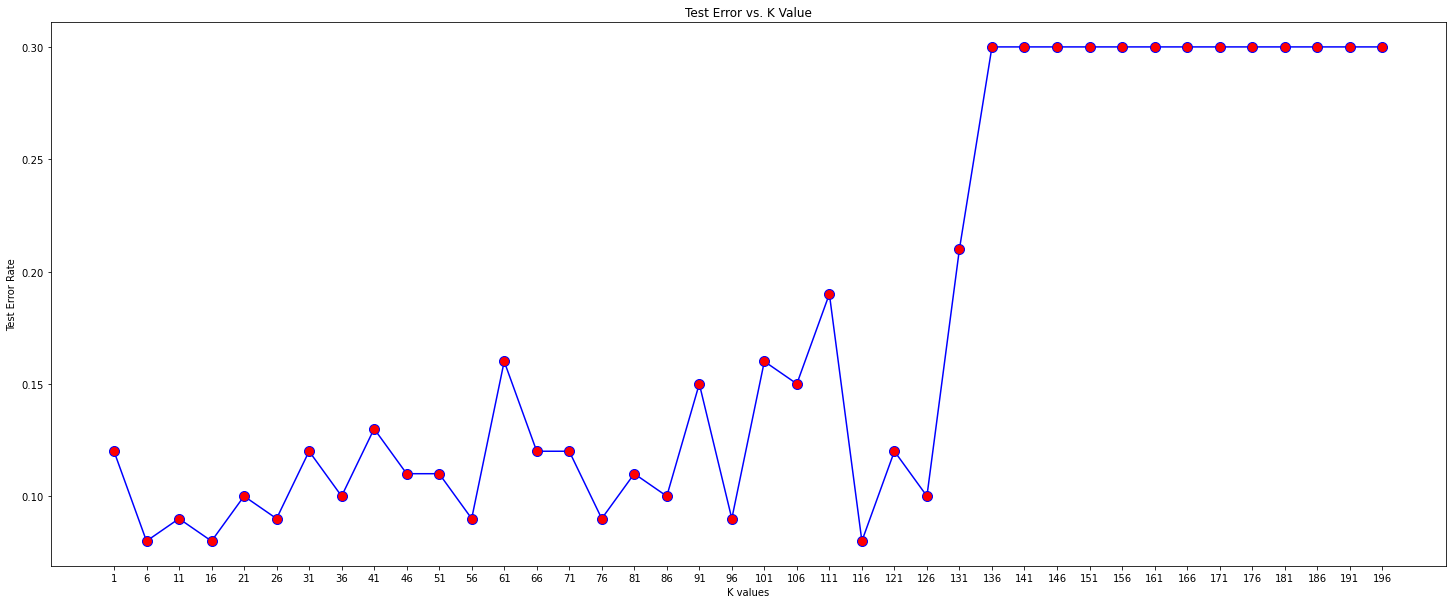

In [ ]:
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors


neighborMaha = np.arange(1, 197, 5)

train_accuracyMaha = np.empty(len(neighborMaha))
test_accuracyMaha = np.empty(len(neighborMaha))

errorMaha = []
#error2 = []

for i,k in enumerate(neighborMaha):
    modelMaha = KNeighborsClassifier(n_neighbors = k, metric_params={'VI': np.cov(X_train, rowvar = False)}, metric = 'mahalanobis')
    modelMaha.fit(X_train, y_train)
    y_predictMaha = modelMaha.predict(X_test)
    errorMaha.append(np.mean(y_predictMaha != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyMaha[i] = modelMaha.score(X_train, y_train)
    test_accuracyMaha[i] = modelMaha.score(X_test, y_test)

print(errorMaha)
plt.figure(figsize =(25, 10))
plt.plot(errorMaha, color ='blue', linestyle ='solid', marker ='o', markerfacecolor ='red', markersize = 10)
plt.xticks(range(len(neighborMaha)), neighborMaha)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('Most suitable k* in Mahalanobis Distance is at k = 6 with Min error of', min(errorMaha))

Most suitable k* in Mahalanobis Distance is at k = 6 with Min error of 0.08


## Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, ... 196}


### Weighted Euclidean Metric

[0.13, 0.1, 0.12, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.13, 0.14, 0.14, 0.12, 0.14, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.17, 0.19, 0.19, 0.2, 0.23, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.28]


Text(0, 0.5, 'Test Error Rate')

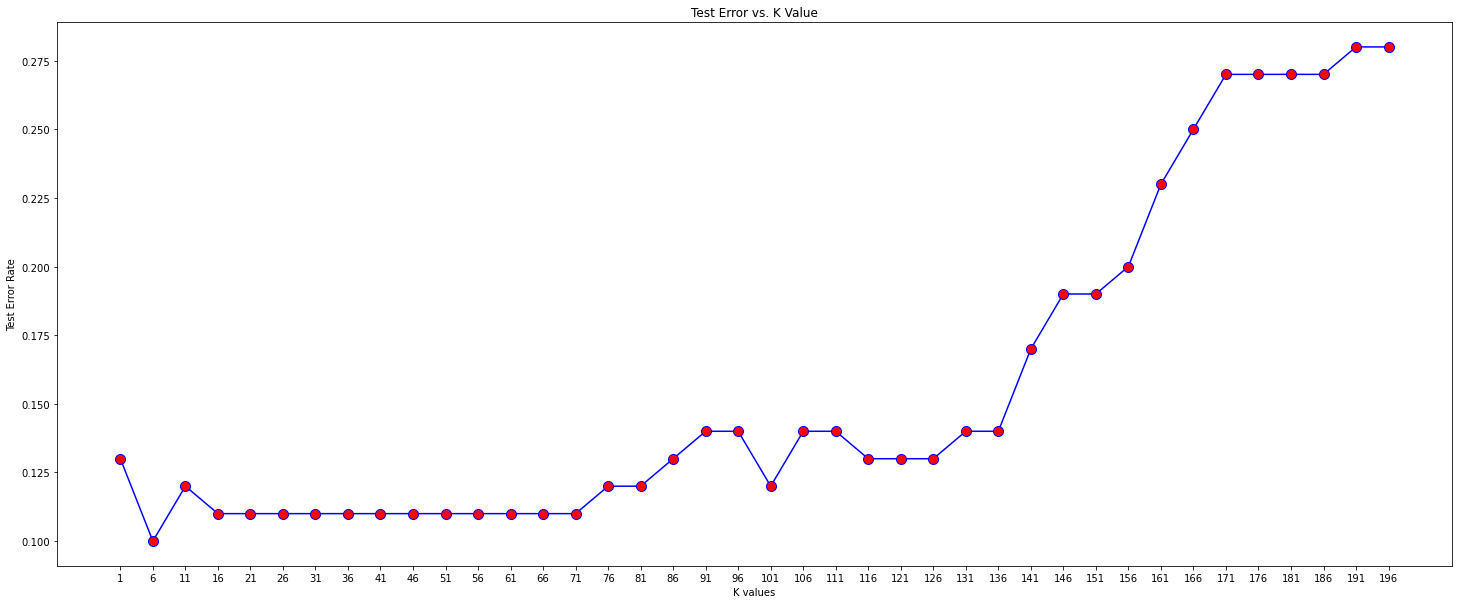

In [ ]:
neighborWEu = np.arange(1, 197, 5)

train_accuracyWEu = np.empty(len(neighborWEu))
test_accuracyWEu = np.empty(len(neighborWEu))

errorWEu = []
#error2 = []

for i,k in enumerate(neighborWEu):
    modelWEu = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    modelWEu.fit(X_train, y_train)
    y_predictWEu = modelWEu.predict(X_test)
    errorWEu.append(np.mean(y_predictWEu != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyWEu[i] = modelWEu.score(X_train, y_train)
    test_accuracyWEu[i] = modelWEu.score(X_test, y_test)

print(errorWEu)
plt.figure(figsize =(25, 10))
plt.plot(errorWEu, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xticks(range(len(neighborWEu)), neighborWEu)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('k at', neighborWEu[errorWEu.index(min(errorWEu))], 'gives best value, with Min error of ', min(errorWEu)) #Best K is at 6 for Weighted Euclidean Metric 

k at 6 gives best value, with Min error of  0.1


### Weighted Manhatten Metric

[0.11, 0.11, 0.11, 0.12, 0.11, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.13, 0.13, 0.11, 0.12, 0.14, 0.14, 0.13, 0.13, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.21, 0.24, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.29]


Text(0, 0.5, 'Test Error Rate')

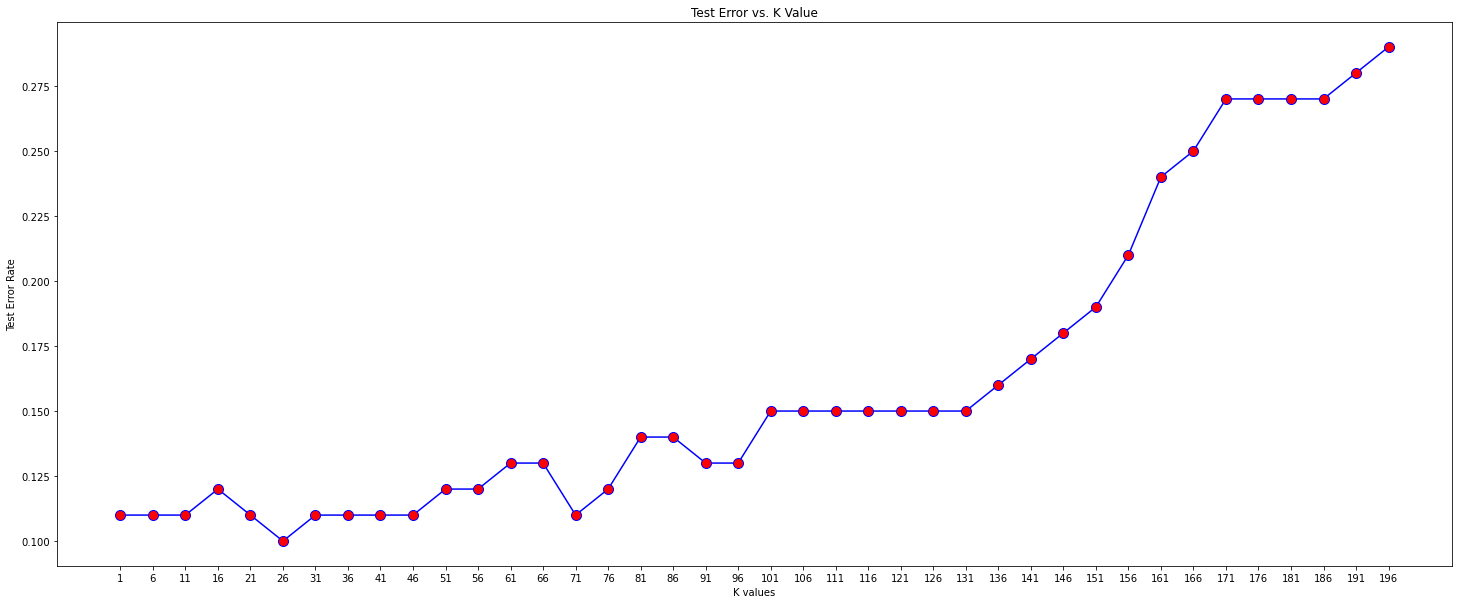

In [ ]:
neighborWMa = np.arange(1, 197, 5)

train_accuracyWMa = np.empty(len(neighborWMa))
test_accuracyWMa = np.empty(len(neighborWMa))

errorWMa = []
#error2 = []

for i,k in enumerate(neighborWMa):
    modelWMa = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p = 1, weights='distance')
    modelWMa.fit(X_train, y_train)
    y_predictWMa = modelWMa.predict(X_test)
    errorWMa.append(np.mean(y_predictWMa != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyWMa[i] = modelWMa.score(X_train, y_train)
    test_accuracyWMa[i] = modelWMa.score(X_test, y_test)

print(errorWMa)
plt.figure(figsize =(25, 10))
plt.plot(errorWMa, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xticks(range(len(neighborWMa)), neighborWMa)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('k at', neighborWEu[errorWMa.index(min(errorWMa))], 'gives best value, with Min error of ', min(errorWMa)) #Best K is at 26 for Weighted Manhatten Metric 

k at 26 gives best value, with Min error of  0.1


### Weighted Chebyshev Metric

[0.13, 0.13, 0.12, 0.11, 0.12, 0.12, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.11, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.14, 0.16, 0.16, 0.18, 0.19, 0.21, 0.21, 0.23, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28]


Text(0, 0.5, 'Test Error Rate')

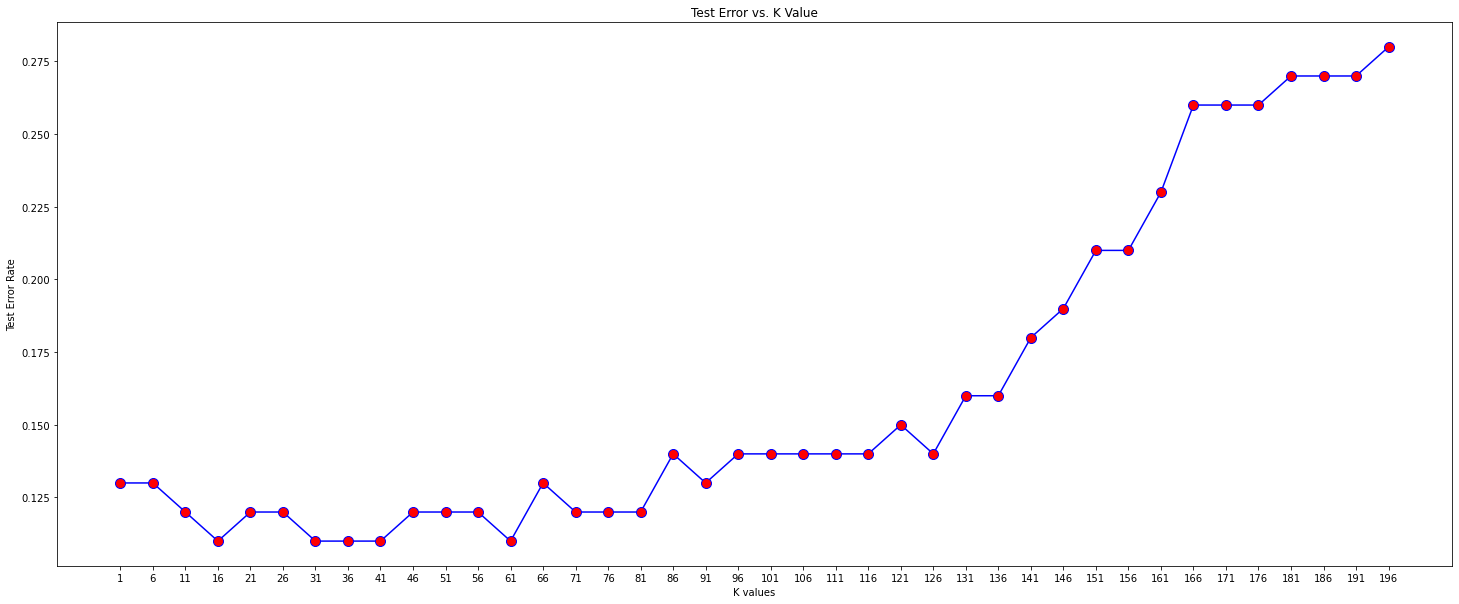

In [ ]:
neighborWCh = np.arange(1, 197, 5)

train_accuracyWCh = np.empty(len(neighborWCh))
test_accuracyWCh = np.empty(len(neighborWCh))

errorWCh = []
#error2 = []

for i,k in enumerate(neighborWCh):
    modelWCh = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    modelWCh.fit(X_train, y_train)
    y_predictWCh = modelWCh.predict(X_test)
    errorWCh.append(np.mean(y_predictWCh != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyWCh[i] = modelWCh.score(X_train, y_train)
    test_accuracyWCh[i] = modelWCh.score(X_test, y_test)

    
print(errorWCh)
plt.figure(figsize =(25, 10))
plt.plot(errorWCh, color ='blue',
                linestyle ='solid', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xticks(range(len(neighborWCh)), neighborWCh)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('k at', neighborWCh[errorWCh.index(min(errorWCh))], 'gives best value, with Min error of ', min(errorWCh)) #Best K is at 4 for Weighted Chebyshev Metric 

k at 16 gives best value, with Min error of  0.11


### Weighted Mahalanobis Metric

[0.12, 0.11, 0.09, 0.1, 0.09, 0.09, 0.1, 0.1, 0.11, 0.13, 0.11, 0.11, 0.12, 0.1, 0.1, 0.09, 0.09, 0.09, 0.1, 0.09, 0.11, 0.11, 0.1, 0.09, 0.09, 0.09, 0.11, 0.1, 0.11, 0.13, 0.13, 0.14, 0.17, 0.19, 0.21, 0.22, 0.24, 0.26, 0.26, 0.26]


Text(0, 0.5, 'Test Error Rate')

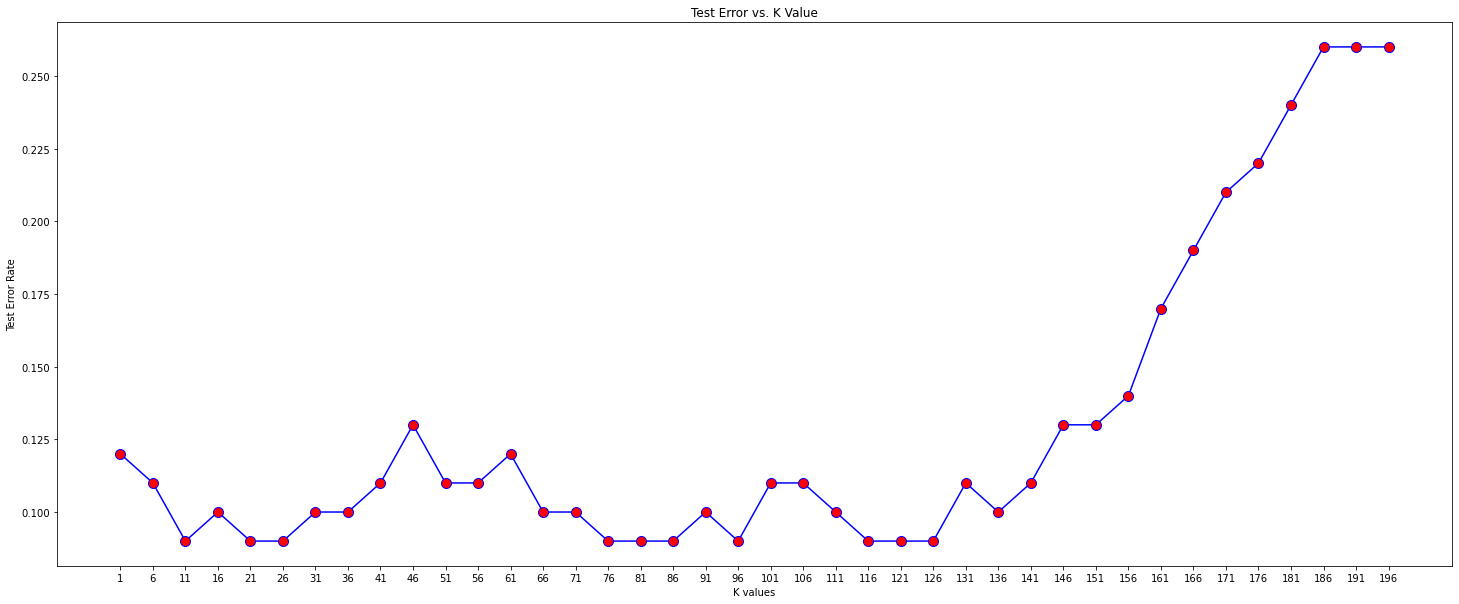

In [ ]:
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors


neighborWMaha = np.arange(1, 197, 5)

train_accuracyWMaha = np.empty(len(neighborWMaha))
test_accuracyWMaha = np.empty(len(neighborWMaha))

errorWMaha = []
#error2 = []

for i,k in enumerate(neighborWMaha):
    modelWMaha = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric_params={'VI': np.cov(X_train, rowvar = False)}, metric = 'mahalanobis')
    modelWMaha.fit(X_train, y_train)
    y_predictWMaha = modelWMaha.predict(X_test)
    errorWMaha.append(np.mean(y_predictWMaha != y_test))  #?
    #error2.append(np.mean(y_predict))
    train_accuracyWMaha[i] = modelWMaha.score(X_train, y_train)
    test_accuracyWMaha[i] = modelWMaha.score(X_test, y_test)

    
print(errorWMaha)
plt.figure(figsize =(25, 10))
plt.plot(errorWMaha, color ='blue', linestyle ='solid', marker ='o', markerfacecolor ='red', markersize = 10)
plt.xticks(range(len(neighborWMaha)), neighborWMaha)
plt.title('Test Error vs. K Value')
plt.xlabel('K values')
plt.ylabel('Test Error Rate')

In [ ]:
print('Most suitable k* in Weighted Mahalanobis Distance is at k =', neighborWMaha[errorWMaha.index(min(errorWMaha))], 'with Min error of', min(errorWMaha))

Most suitable k* in Weighted Mahalanobis Distance is at k = 11 with Min error of 0.09


## Summary of Best K* and Lowest Testing Errors

 Uniform Euclidean | Uniform Manhatten | Uniform Chebyshev | Log(p)| Uniform Mahalanobis | Weighted Euclidean | Weighted Manhatten | Weighted Chebyshev| Weighted Mahalanobis
-----|-----|-----|-----|-----|-----|----- |-----|-----
Best k* = 4|Best k* = 1|Best k* = 16 | Best k* = 1| Best k* = 6 | Best k* = 6|Best k* = 26| Best k* = 16|Best k* = 11
Error at k* =0.06 |Error at k* = 0.11|Error at k* = 0.08 | Error at k*=0.11| Error at k* = 0.08 | Error at k* = 0.1|Error at k* = 0.1| Error at k* = 0.11|Error at k* = 0.09


## Lowest training error rate you achieved in this homework

In [ ]:

table_trainerror = pd.DataFrame([error_train]).T
table_trainerror['Train Error'] = table_trainerror
table_trainerror = table_trainerror.drop(columns = 0)

table_trainerror = pd.concat([table_trainerror, df9], axis = 1)

table_trainerror.head(100)



,Train Error,neighbor
0,0.333333,208
1,0.333333,205
2,0.333333,202
3,0.333333,199
4,0.333333,196
...,...,...
65,0.142857,13
66,0.133333,10
67,0.142857,7
68,0.142857,4


#### Lowest training error is 0.00 at K = 1 using Uniform Euclidean Metric